In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
isocronas = pd.read_csv('../Isocronas/Regression_Iso.txt', header = 0)

In [3]:
from scipy.interpolate import interp1d

Text(0.5, 1.0, 'Interpolação linear: cor do turnoff \n em função da idade')

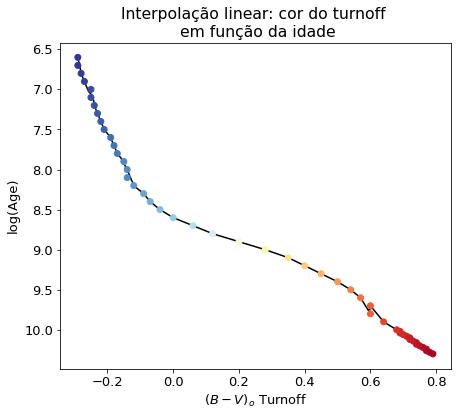

In [4]:
f1 = interp1d(isocronas['(B-V)TurnOff'],  isocronas['Age'],kind= 'linear')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(7,6)) #(figsize=(10,8))
plt.gca().invert_yaxis()



interpol_colour = np.linspace(isocronas['(B-V)TurnOff'].min(),isocronas['(B-V)TurnOff'].max(),100)
plt.plot(interpol_colour,f1(interpol_colour), color = 'k')
plt.scatter(isocronas['(B-V)TurnOff'], isocronas['Age'], c = isocronas['(B-V)TurnOff'],cmap = 'RdYlBu_r', zorder = 10)
plt.ylabel('log(Age)')
plt.xlabel(r'$(B-V)_o$' + ' Turnoff')
plt.title('Interpolação linear: cor do turnoff \n em função da idade')
#plt.savefig('Imagens_Relat/interpolacao.png', format = 'png', dpi = 1000)


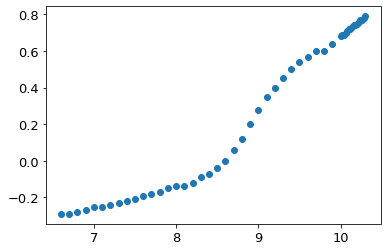

In [5]:
plt.scatter( isocronas['Age'], isocronas['(B-V)TurnOff'],   cmap = 'RdYlBu_r')

## Aglomerado 1, E(B-V)=0.1

In [6]:
ag1 = pd.read_csv('LinearRegressAG1.txt', header = 0)
ag1.head()

,Slope,Intercept,Slope_Error,Intercept_Error,TurnOffColor
0,5.164931,6.893856,0.057215,0.047736,-0.157596


In [68]:
idade1 = f1(ag1['TurnOffColor ']-0.1)
idade1

array([7.0240387])

In [8]:
isocro1 = isocronas[isocronas['Age'] ==7.0]
isocro1

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
45,7.0,6.443027,0.581311,0.067584,0.0336,0.999615,-0.25,-2.74,0.140625= 9/64


In [9]:
## Método do Slope do Aglomerado
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)
d1 = distancia(ag1['Slope'].item(), ag1[' Intercept'].item(), isocro1['Intercept'].item(),0.1)
d1

201.28331271475483

In [10]:
i1 = pd.read_csv('ag1.txt',header = 0)
i1.head()

,B-V,V
0,0.820441,10.900357
1,-0.033763,6.542515
2,1.692215,14.662077
3,0.803042,15.521706
4,0.559854,9.774405


In [11]:
iso = pd.read_csv('../Isocronas/isocro.csv', header = 0)

idades = iso['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

iso1 = iso[iso['log(Age)']==7.0]

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.0 \n Método Slope Aglomerado')

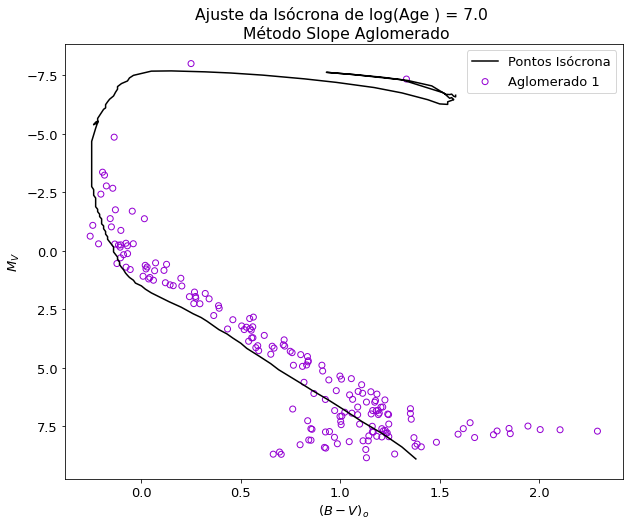

In [69]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso1['(B-V)o'],iso1['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i1['B-V'] - 0.1,i1['V']-5*np.log10(d1/10)-3.1*0.1, label = 'Aglomerado 1', color = 'none', edgecolor = 'darkviolet')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.0 \n Método Slope Aglomerado')
#plt.savefig('./Imagens_Relat/ag1iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.0 \n Método Média dos Slopes')

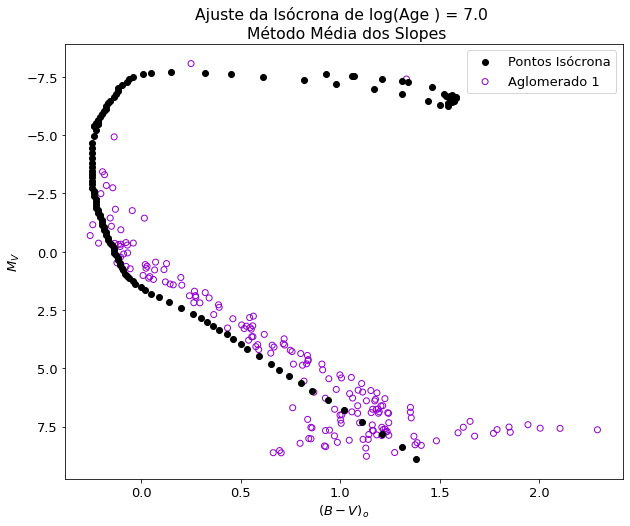

In [57]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

def distancia(a1,a2,b,b0,E):
    return 10**((0.5*(a1+a2)*E + (b-b0) - E*3.1 + 5 )/5)

d1m = distancia(ag1['Slope'].item(), isocro1['Slope'].item(), ag1[' Intercept'].item(), isocro1['Intercept'].item(),0.1)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso1['(B-V)o'],iso1['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i1['B-V'] - 0.1,i1['V']-5*np.log10(d1m/10)-3.1*0.1, label = 'Aglomerado 1', color = 'none', edgecolor = 'darkviolet')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.0 \n Método Média dos Slopes')
#plt.savefig('./Imagens_Relat/ag1iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.0 \n Método Slope da Isócrona')

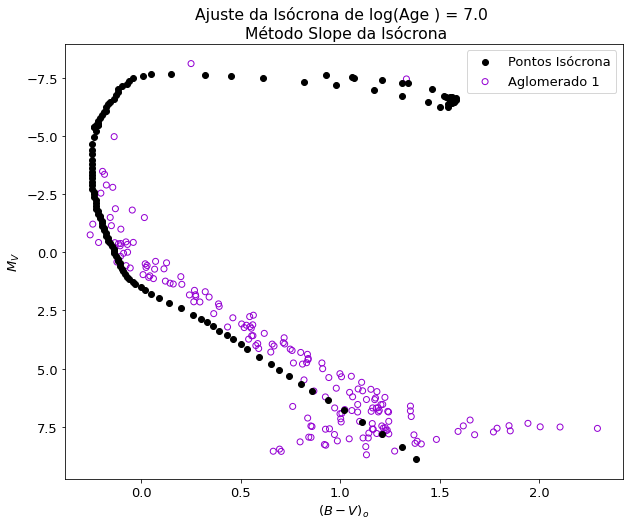

In [58]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)

d1s = distancia(isocro1['Slope'].item(), ag1[' Intercept'].item(), isocro1['Intercept'].item(),0.1)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso1['(B-V)o'],iso1['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i1['B-V'] - 0.1,i1['V']-5*np.log10(d1s/10)-3.1*0.1, label = 'Aglomerado 1', color = 'none', edgecolor = 'darkviolet')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.0 \n Método Slope da Isócrona')
#plt.savefig('./Imagens_Relat/ag1iso.png', dpi = 1000, format = 'png')

## Aglomerado 2, E(B-V) = 0.5

In [13]:
ag2 = pd.read_csv('LinearRegressAG2.txt', header = 0)
ag2.head()

,Slope,Intercept,Slope_Error,Intercept_Error,TurnOffColor
0,5.854872,6.137198,0.023602,0.030893,0.329951


In [14]:
idade2 = f1(ag2['TurnOffColor ']-0.5)
print(idade2)

[7.7995101]


In [15]:
isocro2 = isocronas[isocronas['Age'] ==7.8]
isocro2

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
37,7.8,5.909142,0.94259,0.046907,0.027805,0.999811,-0.17,-1.25,0.16666666666666666= 8/48


In [16]:
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)

d2 = distancia(ag2['Slope'].item(),ag2[' Intercept'].item(), isocro2['Intercept'].item(),0.5)
d2

206.25702587588438

In [17]:
i2 = pd.read_csv('ag2.txt',header = 0)
i2.head()

,B-V,V
0,1.110742,12.999174
1,0.426737,8.766554
2,1.962863,16.706395
3,1.812563,16.906182
4,1.062060,11.962806


In [18]:
iso2 = iso[iso['log(Age)']==7.8]

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.8 \n Método Slope do Aglomerado')

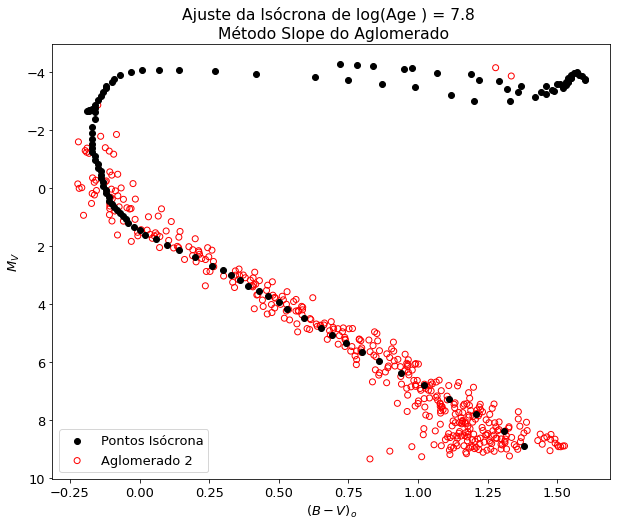

In [59]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso2['(B-V)o'],iso2['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
#plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Isocronas', color = 'black')
plt.scatter(i2['B-V'] - 0.5,i2['V']-5*np.log10(d2/10)-3.1*0.5, label = 'Aglomerado 2', color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.8 \n Método Slope do Aglomerado')
#plt.savefig('./Imagens_Relat/ag2iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.8 \n Método Média dos Slopes')

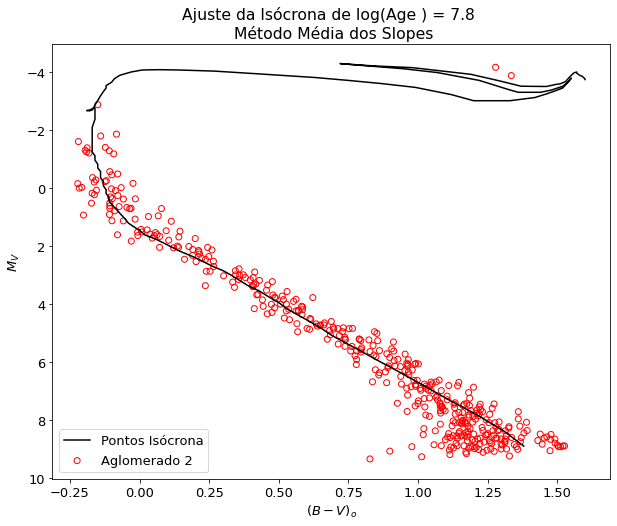

In [61]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

def distancia(a1,a2,b,b0,E):
    return 10**((0.5*(a1+a2)*E + (b-b0) - E*3.1 + 5 )/5)

d2m = distancia(ag2['Slope'].item(),isocro2['Slope'],ag2[' Intercept'].item(), isocro2['Intercept'].item(),0.5)


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
#plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Isocronas', color = 'black')
plt.scatter(i2['B-V'] - 0.5,i2['V']-5*np.log10(d2m.item()/10)-3.1*0.5, label = 'Aglomerado 2', color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.8 \n Método Média dos Slopes')
#plt.savefig('./Imagens_Relat/ag2iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 7.8 \n Método Slope da Iso')

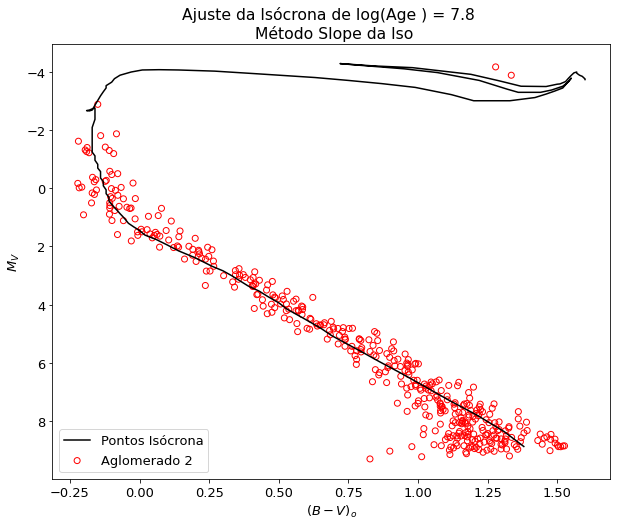

In [62]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)

d2s = distancia(isocro2['Slope'],ag2[' Intercept'].item(), isocro2['Intercept'].item(),0.5)


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
#plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Isocronas', color = 'black')
plt.scatter(i2['B-V'] - 0.5,i2['V']-5*np.log10(d2s.item()/10)-3.1*0.5, label = 'Aglomerado 2', color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 7.8 \n Método Slope da Iso')
#plt.savefig('./Imagens_Relat/ag2iso.png', dpi = 1000, format = 'png')

## Aglomerado 3, E(B-V) = 0.3

In [20]:
ag3 = pd.read_csv('LinearRegressAG3.txt', header = 0)
ag3.head()

,Slope,Intercept,Slope_Error,Intercept_Error,TurnOffColor
0,6.172207,5.731096,0.009577,0.01184,0.479499


In [21]:
idade3 = f1(ag3['TurnOffColor ']-0.3)
print(idade3)

[8.87437334]


In [22]:
isocro3 = isocronas[isocronas['Age'] == 8.9]
isocro3

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
26,8.9,5.849284,0.847525,0.04543,0.031448,0.999759,0.2,1.57,0.4166666666666667= 10/24


In [23]:
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)
d3 = distancia(ag3['Slope'].item(),ag3[' Intercept'].item(), isocro3['Intercept'].item(),0.3)
d3

144.89274596847855

In [24]:
def distancia(a1,a2,b,b0,E):
    return 10**(((a1+a2)/2*E + (b-b0) - E*3.1 + 5 )/5)
distancia(ag3['Slope'].item(),isocro3['Slope'].item(),ag3[' Intercept'].item(), isocro3['Intercept'].item(),0.3)

141.69644990911738

In [25]:
i3 = pd.read_csv('ag3.txt',header = 0)
i3.head()

,B-V,V
0,1.204533,12.559566
1,0.700453,8.983786
2,1.582116,15.913256
3,1.540805,15.910005
4,1.023942,11.734744


In [26]:
iso3 = iso[iso['log(Age)']==8.9]

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 8.9 \n Método Slope do Aglomerado')

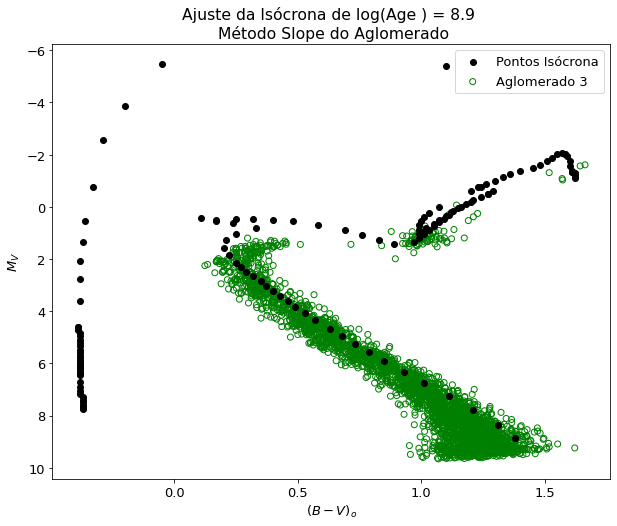

In [71]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso3['(B-V)o'],iso3['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i3['B-V'] - 0.3,i3['V']-5*np.log10(d3/10)-3.1*0.3, label = 'Aglomerado 3', color = 'none', edgecolor = 'green')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 8.9 \n Método Slope do Aglomerado')
#plt.savefig('./Imagens_Relat/ag3iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 8.9 \n Método Média dos Slopes')

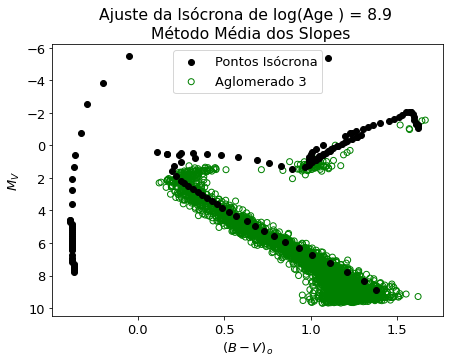

In [52]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


def distancia(a1,a2,b,b0,E):
    return 10**((0.5*(a1+a2)*E + (b-b0) - E*3.1 + 5 )/5)
d3m = distancia(ag3['Slope'].item(),isocro3['Slope'], ag3[' Intercept'].item(), isocro3['Intercept'].item(),0.3)


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(7,5)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso3['(B-V)o'],iso3['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i3['B-V'] - 0.3,i3['V']-5*np.log10(d3m.item()/10)-3.1*0.3, label = 'Aglomerado 3', color = 'none', edgecolor = 'green')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 8.9 \n Método Média dos Slopes')
#plt.savefig('./Imagens_Relat/ag3iso.png', dpi = 1000, format = 'png')

Text(0.5, 1.0, 'Ajuste da Isócrona de log(Age ) = 8.9 \n Método Slope da Isócrona')

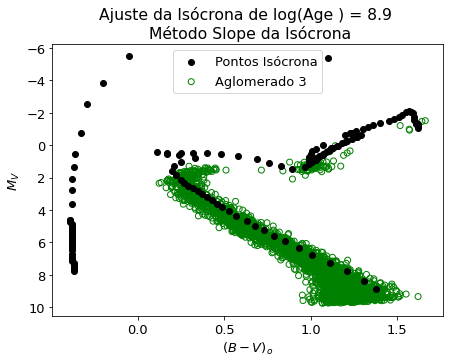

In [54]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)
d3s = distancia(isocro3['Slope'], ag3[' Intercept'].item(), isocro3['Intercept'].item(),0.3)


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(7,5)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.scatter(iso3['(B-V)o'],iso3['Mv'], label = 'Pontos Isócrona', color = 'black', zorder = 10)
plt.scatter(i3['B-V'] - 0.3,i3['V']-5*np.log10(d3s.item()/10)-3.1*0.3, label = 'Aglomerado 3', color = 'none', edgecolor = 'green')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)_o$")
plt.ylabel(r"$M_V$")
plt.title('Ajuste da Isócrona de log(Age ) = 8.9 \n Método Slope da Isócrona')
#plt.savefig('./Imagens_Relat/ag3iso.png', dpi = 1000, format = 'png')